#  Making Bag of Words Model

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

paragraph = """The question of the importance of life is a deeply philosophical and subjective matter. Different individuals and cultures may have varying perspectives and beliefs regarding the significance of life. Here are a few perspectives that people commonly consider when contemplating the importance of life:

Inherent Value: Many people believe that life has inherent value simply because it exists. They argue that all living beings, including humans and other forms of life, have a right to exist and flourish.

Meaning and Purpose: Some individuals find the importance of life in the search for meaning and purpose. They believe that life gains significance through personal achievements, relationships, contribution to society, or spiritual or religious beliefs.
Emotional Connections: Relationships and emotional connections with other individuals, such as family, friends, and loved ones, can bring great joy and fulfillment to life. For many, the importance of life lies in the bonds and experiences shared with others.

Growth and Development: Life provides opportunities for personal growth, learning, and self-improvement. The pursuit of knowledge, skills, and personal development can be seen as essential aspects of a meaningful life.

Transcendent or Spiritual Beliefs: Some people find the importance of life in transcendent or spiritual beliefs. They may believe in an afterlife, karma, or a higher power, which can shape their perception of the significance of life on a cosmic or metaphysical level.

It's important to note that these perspectives are not exhaustive, and different individuals may find importance in other aspects of life as well. Ultimately, the question of the importance of life is a deeply personal and subjective matter, and each person may have their own unique perspective.




"""

In [2]:
paragraph

"The question of the importance of life is a deeply philosophical and subjective matter. Different individuals and cultures may have varying perspectives and beliefs regarding the significance of life. Here are a few perspectives that people commonly consider when contemplating the importance of life:\n\nInherent Value: Many people believe that life has inherent value simply because it exists. They argue that all living beings, including humans and other forms of life, have a right to exist and flourish.\n\nMeaning and Purpose: Some individuals find the importance of life in the search for meaning and purpose. They believe that life gains significance through personal achievements, relationships, contribution to society, or spiritual or religious beliefs.\nEmotional Connections: Relationships and emotional connections with other individuals, such as family, friends, and loved ones, can bring great joy and fulfillment to life. For many, the importance of life lies in the bonds and exper

In [3]:
# Tokening The Words
text = "Growth and Development: Life provides opportunities for personal growth, learning, and self-improvement. The pursuit of knowledge, skills, and personal development can be seen as essential aspects of a meaningful life."

text_tokens = word_tokenize(text)
text_tokens

['Growth',
 'and',
 'Development',
 ':',
 'Life',
 'provides',
 'opportunities',
 'for',
 'personal',
 'growth',
 ',',
 'learning',
 ',',
 'and',
 'self-improvement',
 '.',
 'The',
 'pursuit',
 'of',
 'knowledge',
 ',',
 'skills',
 ',',
 'and',
 'personal',
 'development',
 'can',
 'be',
 'seen',
 'as',
 'essential',
 'aspects',
 'of',
 'a',
 'meaningful',
 'life',
 '.']

In [4]:
len(text_tokens)

37

In [5]:
# Cleaning the texts
import re # re library will use for regular expression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
pst = PorterStemmer()
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

In [6]:
words_to_stem = ['provide','provides','providing','provided']
for words in words_to_stem:
    print(words+ ':' + pst.stem(words))
    

provide:provid
provides:provid
providing:provid
provided:provid


In [7]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
sentences

['The question of the importance of life is a deeply philosophical and subjective matter.',
 'Different individuals and cultures may have varying perspectives and beliefs regarding the significance of life.',
 'Here are a few perspectives that people commonly consider when contemplating the importance of life:\n\nInherent Value: Many people believe that life has inherent value simply because it exists.',
 'They argue that all living beings, including humans and other forms of life, have a right to exist and flourish.',
 'Meaning and Purpose: Some individuals find the importance of life in the search for meaning and purpose.',
 'They believe that life gains significance through personal achievements, relationships, contribution to society, or spiritual or religious beliefs.',
 'Emotional Connections: Relationships and emotional connections with other individuals, such as family, friends, and loved ones, can bring great joy and fulfillment to life.',
 'For many, the importance of life li

In [9]:
corpus = []
# Create the empty list name as corpus because after cleaned the data corpus will store this clean data
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]','', sentences[i])
    review = review.lower()
    review = review.split()
#   review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ''.join(review)
    corpus.append(review)

In [10]:
# Creating the bag of words model
# Also we called as document matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [11]:
print(x)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_1 = TfidfVectorizer()
x_tf = cv_1.fit_transform(corpus).toarray()

In [13]:
print('',x_tf)

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
print("",x)

 [[0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
x1 = cv1.fit_transform(corpus).toarray()

In [16]:
print(x1)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
tokenized_corpus = [word_tokenize(sentence) for sentence in corpus]
word2vec_model = Word2Vec(tokenized_corpus, min_count = 1)
print("Word2Vec representation:")
for sentence in tokenized_corpus:
    for word in sentence:
        print(f"(word): {word2vec_model.wv[word]}")

Word2Vec representation:
(word): [-0.00950012  0.00956222 -0.00777076 -0.00264551 -0.00490641 -0.0049667
 -0.00802359 -0.00778358 -0.00455321 -0.00127536 -0.00510299  0.00614054
 -0.00951662 -0.0053071   0.00943715  0.00699133  0.00767582  0.00423474
  0.00050709 -0.00598114  0.00601878  0.00263503  0.00769943  0.00639384
  0.00794257  0.00865741 -0.00989575 -0.0067557   0.00133757  0.0064403
  0.00737382  0.00551698  0.00766163 -0.00512557  0.00658441 -0.00410837
 -0.00905534  0.00914168  0.0013314  -0.00275968 -0.00247784 -0.00422048
  0.00481234  0.00440022 -0.00265336 -0.00734188 -0.00356585 -0.00033661
  0.00609589 -0.00283734 -0.00012089  0.00087973 -0.00709565  0.002065
 -0.00143242  0.00280215  0.00484222 -0.00135202 -0.00278014  0.00773865
  0.0050456   0.00671352  0.00451564  0.00866716  0.00747497 -0.00108189
  0.00874764  0.00460172  0.00544063 -0.00138608 -0.00204132 -0.00442435
 -0.0085152   0.00303773  0.00888319  0.00891974 -0.00194235  0.00608616
  0.00377972 -0.004295

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ("Importance  Internet  things Knowledge Technology Use technology Explore Information Computer Artificial Intellegence network server sensor modern data science python database datamining mechine learning deeplearning cloudbase  nature language processing AI")
text

'Importance  Internet  things Knowledge Technology Use technology Explore Information Computer Artificial Intellegence network server sensor modern data science python database datamining mechine learning deeplearning cloudbase  nature language processing AI'

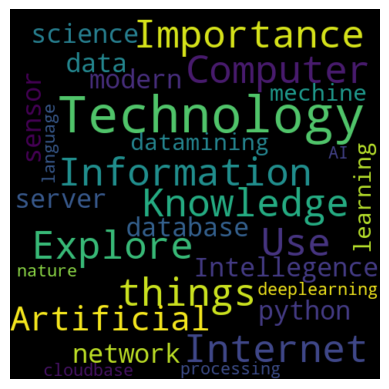

In [19]:
wordcloud = WordCloud(height =480,width =480 ,margin =0).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=2, y=2)
plt.show()
